In [1]:
import os
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from IPython.display import display, HTML

Переглянемо список 3 країн, які необхідні згідно з моїм варіантом.

In [2]:
names_countries = pd.read_csv('../tasks.csv', header=0, names=['Країна 1', 'Країна 2', 'Країна 3'])
names_countries.head(9)

,Країна 1,Країна 2,Країна 3
Аніщенко Ігор,Lithuania,Niger,United Kingdom
Димов Максим,Belarus,Honduras,Curacao
Єрмоленко Назар,Chile,New Zealand,Netherlands
Жигамовський Нікіта,South Sudan,Mexico,China
Кравченко Тетяна,Spain,Bangladesh,Iceland
Марченко Ігор,Bahrain,Belarus,Ukraine
Нестеров Олег,Suriname,Austria,Uruguay
Пороскун Олена,Bermuda,France,Panama
Прокопенко Микита,Ethiopia,Cyprus,Equatorial Guinea


In [3]:
names_countries = names_countries.loc['Пороскун Олена']
filter_country = names_countries.values
filter_country = [f for f in filter_country]
filter_country

['Bermuda', 'France', 'Panama']

### Task 1 Популяція за інтервал часу 1960-2020

* ### Таблиця

In [4]:
print(os.listdir('../src/population'))

['population.json', 'population.csv', 'population_pandas.xlsx']


In [5]:
data_population = pd.read_csv('../src/population/population.csv')

In [6]:
data_population

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1960,92197753
1,Arab World,ARB,1961,94724510
2,Arab World,ARB,1962,97334442
3,Arab World,ARB,1963,100034179
4,Arab World,ARB,1964,102832760
...,...,...,...,...
15404,Zimbabwe,ZWE,2014,13586681
15405,Zimbabwe,ZWE,2015,13814629
15406,Zimbabwe,ZWE,2016,14030390
15407,Zimbabwe,ZWE,2017,14236745


Відфільтруємо згідно з країнами мого варіанту.

In [7]:
data_population_filtered = data_population.query('`Country Name` in @filter_country')
data_population_filtered

,Country Name,Country Code,Year,Value
3953,Bermuda,BMU,1960,44400
3954,Bermuda,BMU,1961,45500
3955,Bermuda,BMU,1962,46600
3956,Bermuda,BMU,1963,47700
3957,Bermuda,BMU,1964,48900
...,...,...,...,...
11667,Panama,PAN,2014,3901315
11668,Panama,PAN,2015,3968487
11669,Panama,PAN,2016,4037078
11670,Panama,PAN,2017,4106771


In [8]:
data_population_filtered['Country Name'].unique()

array(['Bermuda', 'France', 'Panama'], dtype=object)

In [9]:
#data_population_filtered['Year'].unique()

In [10]:
data_population_filtered.describe()

,Year,Value
count,177.000000,1.770000e+02
mean,1989.000000,2.013498e+07
std,17.077697,2.696568e+07
min,1960.000000,4.440000e+04
25%,1974.000000,6.374000e+04
50%,1989.000000,2.419426e+06
75%,2004.000000,5.359223e+07
max,2018.000000,6.697711e+07


Як бачимо мінімальне значення колонки **'Year'** = 1960, а максимальне - 2018. Тому популяція за 1960 - 2020 роки це сама таблиця **data_population_filtered**.

**Також можна сформувати таблицю за необхідний період часу іншим чином.**

Створюємо нову таблицю популяції за фільтром інтервалу часу 1960 - 2020.

In [11]:
cust_filter = 1960
cust_filter2 = 2020
data_population_1960_2020 = data_population.query('(Year >= @cust_filter | Year <= @cust_filter2) & `Country Name` in @filter_country')
data_population_1960_2020

,Country Name,Country Code,Year,Value
3953,Bermuda,BMU,1960,44400
3954,Bermuda,BMU,1961,45500
3955,Bermuda,BMU,1962,46600
3956,Bermuda,BMU,1963,47700
3957,Bermuda,BMU,1964,48900
...,...,...,...,...
11667,Panama,PAN,2014,3901315
11668,Panama,PAN,2015,3968487
11669,Panama,PAN,2016,4037078
11670,Panama,PAN,2017,4106771


Можемо перевірити чи правильно були відфільтровані дані за допомогою методу **unique()**.

In [12]:
uniq_data = data_population_1960_2020['Year'].unique()
print('number of unique elements:', len(uniq_data))

number of unique elements: 59


Тому можемо дізнатися кількість унікальних значень стовпця "Рік" і перевірити чи є серед них значення, які не входять у проміжок 1960 - 2020.

In [13]:
count = 0 
for element in uniq_data:
    if element < 1960 or element > 2020:
        # print('{} is not in [1960, 2020]'.format(element))
        count += 1
        
if count == 0:
    print('All elements of column [\'Year\'] are in [1960, 2020]')
else:
    print('{} elements of column [\'Year\'] are NOT in [1960, 2020]'.format(count))  


All elements of column ['Year'] are in [1960, 2020]


*Отже, таблиця популяції 3 країн за 1960 - 2020 представлена як* **data_population_1960_2020**.

**Чи містять ці 2 датасети, що ми отримали для популяції 1960-2020 для країн згідно з варіантом, однакові елементи?**

In [14]:
data_population_filtered.equals(data_population_1960_2020)

True

Так, тому можемо зберегти будь-який з них.

In [15]:
if not os.path.exists('./tables_and_graphs'):
    os.mkdir('./tables_and_graphs')

In [16]:
data_population_1960_2020.to_csv("./tables_and_graphs/data_population_1960_2020.csv", index=False)

In [17]:
data_population_1960_2020.to_excel("./tables_and_graphs/data_population_1960_2020.xlsx", sheet_name="Sheet1", index=False)

In [18]:
data_population_1960_2020.to_json(path_or_buf="./tables_and_graphs/data_population_1960_2020.json", orient="split")

* ### Графіки

1. #### Лінійний графік

Створимо лінійний графік двома способами. 

*1.1 Лінійний графік популяції 3 країн відповідно до року.*

In [19]:
def fun_xy_plot(dataframe, country):
    
    df1 = dataframe.query('`Country Name` == @country')

    data = df1[['Year', 'Value']].values.tolist()
    #print(df1[['Year', 'Value']].head())
    
    x = np.zeros((len(data), 1))
    y = np.zeros((len(data), 1))
    for i in range(len(data)):
        x[i] = data[i][0]
        y[i] = data[i][1]     
    
    return country, x, y

In [20]:
#filter_country

In [21]:
#print(len(data_population_1960_2020['Year'].unique()))
#data_population_1960_2020['Year'].unique()

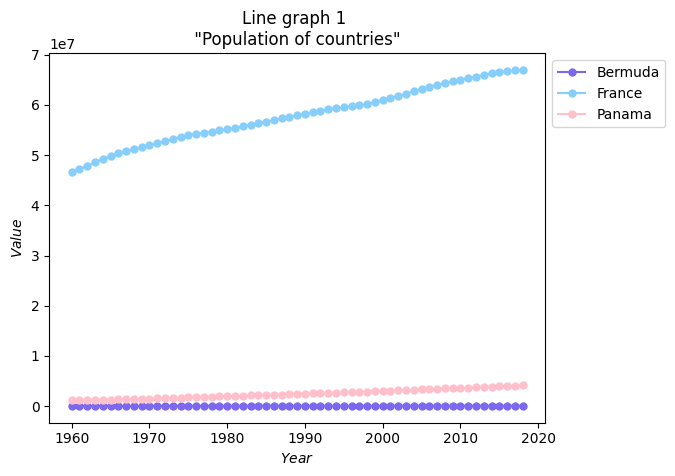

In [22]:
def plot_line1(dateframe, filter_country):
    #print(filter_country)
    colors = ['mediumslateblue', 'lightskyblue', 'pink']
    
    if type(filter_country) == str:
        columns = 1
        country, x, y = fun_xy_plot(dateframe, filter_country) 
        plt.plot(x, y, color=colors[0], label=f'{country}', marker=".", markersize=10)
    else:
        columns = len(filter_country)
        for i in range(columns):
            country, x, y = fun_xy_plot(dateframe, filter_country[i]) 
            plt.plot(x, y, color=colors[i], label=f'{country}', marker=".", markersize=10)
        
    plt.title('Line graph 1 \n "Population of countries" ')
    plt.ylabel('$ Value $')
    plt.xlabel('$ Year $')
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")
    
    plt.savefig('./tables_and_graphs/line1_population.png', bbox_inches='tight')
    
plot_line1(data_population_1960_2020, filter_country)

*1.2 Лінійний графік популяції 3 країн сумарно по країнам. Тобто беремо дані для 3 країн, групуємо їх по стовпцю* **'Country Name'** 
*та сумуємо по* **'Value'**, *також сортуємо за зростанням.*

In [23]:
df = data_population_1960_2020
grouped_df = df.groupby('Country Name')['Value'].sum()
top = grouped_df.sort_values(ascending=True)
top

Country Name
Bermuda       3416866
Panama      147509500
France     3412964611
Name: Value, dtype: int64

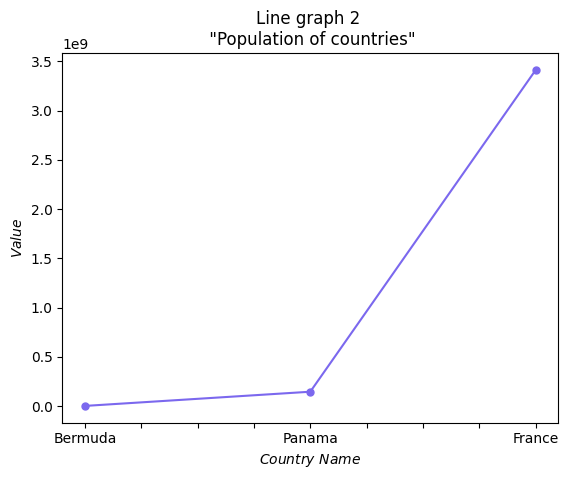

In [24]:
def plot_line2(data):
    fig, ax = plt.subplots()

    #grouped_df = dateframe.groupby('Country Name')['Value'].sum()
    #top = grouped_df
    #top = grouped_df.sort_values(ascending=True)
    top = data
    res = top.plot(x="Year", y="Value", color="mediumslateblue", ylabel='Value', marker=".", markersize=10).get_figure()

    plt.title('Line graph 2 \n "Population of countries"')
    plt.ylabel('$ Value $')
    plt.xlabel('$ Country \ Name $')
    res.savefig('./tables_and_graphs/line2_population.pdf', bbox_inches='tight')
    res.savefig('./tables_and_graphs/line2_population.png', bbox_inches='tight')
    res.savefig('./tables_and_graphs/line2_population.jpg', bbox_inches='tight')
    #plt.legend(bbox_to_anchor=(1,1), loc="upper left")
    
plot_line2(top)  

2. #### Кругова діаграма 

*Аналогічно до 2 варіанту побудови лінійного графіка.*

In [25]:
top

Country Name
Bermuda       3416866
Panama      147509500
France     3412964611
Name: Value, dtype: int64

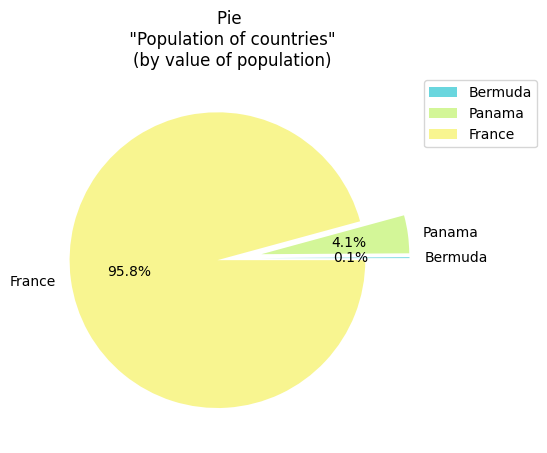

In [26]:
def plot_pie(data):
    
    if len(data) > 3:
        list_exp = [0.05 for i in range(len(data))] 
    else:
        list_exp = [0.2, 0.2, 0.1]
        
    explode = tuple(list_exp)
    
    colors = [
        #[0.57745045, 0.51609339, 0.71706274], # фіолет
        #[0.56698063, 0.71535438, 0.75541086], # сірий
        [0.41062479, 0.8407867,  0.87001545],  # блакит
        [0.82670165, 0.96549147, 0.59721125],  # світло зел
        [0.9737108,  0.96112498, 0.56562821]   # жовтий
    ]
    #colors = ['lavender', 'lightcyan', 'honeydew', 'lightyellow', 'bisque', 'mistyrose',  'whitesmoke'] 
    
    res = data.plot(kind='pie', y = 'Value', autopct='%1.1f%%', explode=explode, ylabel = '',colors = colors, shadow=False).get_figure()

    plt.title('Pie \n "Population of countries" \n(by value of population)')
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")

    res.savefig('./tables_and_graphs/pie_population.png', bbox_inches='tight')
    

plot_pie(top)

3. #### Стовпчаста діаграма

*Аналогічно до 2 варіанту побудови лінійного графіка.*

In [27]:
top

Country Name
Bermuda       3416866
Panama      147509500
France     3412964611
Name: Value, dtype: int64

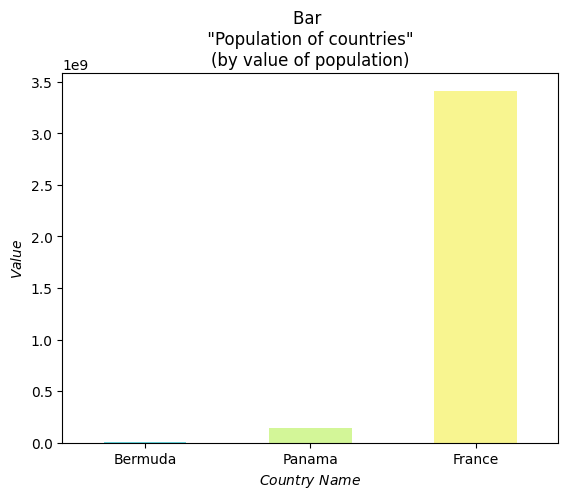

In [28]:
def plot_bar(data): 

    fig, ax = plt.subplots()
    count = len(data)
    #fig, ax = plt.subplots(figsize=(count*2, count*1.5))
    
    #color_rectangle = np.random.rand(count, 3) # RGB
    colors = [
        #[0.57745045, 0.51609339, 0.71706274], # фіолет
        #[0.56698063, 0.71535438, 0.75541086], # сірий
        [0.41062479, 0.8407867,  0.87001545],  # блакит
        [0.82670165, 0.96549147, 0.59721125],  # світло зел
        [0.9737108,  0.96112498, 0.56562821]   # жовтий
    ]
    #colors_light = ['lavender', 'lightcyan', 'honeydew', 'lightyellow', 'bisque', 'mistyrose',  'whitesmoke'] 

    res = top.plot(kind = 'bar', x="Country Name", y="Value", label="Value", color = colors).get_figure()
    
    ax.tick_params(axis='x', labelrotation=0)
    plt.title('Bar \n "Population of countries" \n(by value of population)')
    plt.ylabel('$Value$')
    plt.xlabel('$Country \ Name$')
    
    res.savefig('./tables_and_graphs/bar_population.png', bbox_inches='tight')

plot_bar(top)

### Task 2 Показати в табличному вигляді основні стаститичні величини: min, max, mean, квантіли 25%, 75%, 95%.

1. #### Розглянемо таблицю з розташуванням **'../src/population/population.csv'**.

In [29]:
data_population = pd.read_csv('../src/population/population.csv')
data_population.head(3)

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1960,92197753
1,Arab World,ARB,1961,94724510
2,Arab World,ARB,1962,97334442


In [30]:
data_population_filtered = data_population.query(' `Country Name` in @filter_country ')
#data_population_filtered

In [31]:
data_population_filtered['Country Name'].unique()

array(['Bermuda', 'France', 'Panama'], dtype=object)

In [32]:
statistics_population = data_population_filtered.describe()
display(statistics_population)

,Year,Value
count,177.000000,1.770000e+02
mean,1989.000000,2.013498e+07
std,17.077697,2.696568e+07
min,1960.000000,4.440000e+04
25%,1974.000000,6.374000e+04
50%,1989.000000,2.419426e+06
75%,2004.000000,5.359223e+07
max,2018.000000,6.697711e+07


Знайдемо ще квантілу 95% і перевіримо правильність наступного методу **np.quantile(data, .95)**.

In [33]:
data_quantile = pd.DataFrame(np.zeros((3,2)), columns = ['Year', 'Value'], index = ['25%', '75%', '95%'])

for j in ['Year', 'Value']:
    if j == 'Year':
        data = data_population_filtered['Year']
    else:
        data = data_population_filtered['Value']
        
    data_quantile[j][0] = np.quantile(data, .25)
    data_quantile[j][1] = np.quantile(data, .75)
    data_quantile[j][2] = np.quantile(data, .95)
    
data_quantile

,Year,Value
25%,1974.0,63740.0
75%,2004.0,53592233.0
95%,2015.2,64771133.4


Як бачимо інші знайдені раніше квантіли 25% та 75% такі ж самі як і з методу **np.quantile(data, .95)**.

In [34]:
data_quantile = data_quantile.drop(['25%', '75%'])
statistics_population = pd.concat([statistics_population, data_quantile], ignore_index=False)
display(statistics_population)

,Year,Value
count,177.000000,1.770000e+02
mean,1989.000000,2.013498e+07
std,17.077697,2.696568e+07
min,1960.000000,4.440000e+04
25%,1974.000000,6.374000e+04
50%,1989.000000,2.419426e+06
75%,2004.000000,5.359223e+07
max,2018.000000,6.697711e+07
95%,2015.200000,6.477113e+07


In [35]:
statistics_population.to_csv("./tables_and_graphs/statistics_population.csv", index = True)

In [36]:
#statistics_population.to_excel("./tables_and_graphs/statistics_population.xlsx", sheet_name="Sheet1", index=False)

In [37]:
#statistics_population.to_json(path_or_buf="./tables_and_graphs/statistics_population.json", orient="split")

2. #### Розглянемо таблицю з розташуванням **'../src/ppp/ppp-gdp.csv'**.

In [38]:
data_ppp = pd.read_csv('../src/ppp/ppp-gdp.csv')
#data_ppp.head(3)

In [39]:
data_ppp_filtered = data_ppp.query(' `Country` in @filter_country ')
#data_ppp_filtered 

In [40]:
data_ppp_filtered['Country'].unique()

array(['Bermuda', 'France', 'Panama'], dtype=object)

Знайдемо необхідні величини.

In [41]:
statistics_ppp = data_ppp_filtered.describe()
statistics_ppp

,Year,PPP
count,96.000000,96.000000
mean,2005.500000,0.881732
std,9.281561,0.328308
min,1990.000000,0.458219
25%,1997.750000,0.525021
50%,2005.500000,0.891730
75%,2013.250000,1.188879
max,2021.000000,1.459248


In [42]:
data_quantile = pd.DataFrame(np.zeros((3,2)), columns = ['Year', 'PPP'], index = ['25%', '75%', '95%'])

for j in ['Year', 'PPP']:
    if j == 'Year':
        data = data_ppp_filtered['Year']
    else:
        data = data_ppp_filtered['PPP']
        
    data_quantile[j][0] = np.quantile(data, .25)
    data_quantile[j][1] = np.quantile(data, .75)
    data_quantile[j][2] = np.quantile(data, .95)
    
data_quantile

,Year,PPP
25%,1997.75,0.525021
75%,2013.25,1.188879
95%,2020.00,1.423563


Порівнявши з результатом методу **.describe()** бачимо, що результат такий же. Значення для 95% правильне.

In [43]:
data_quantile = data_quantile.drop(['25%', '75%'])
statistics_ppp = pd.concat([statistics_ppp, data_quantile], ignore_index=False)
display(statistics_ppp)

,Year,PPP
count,96.000000,96.000000
mean,2005.500000,0.881732
std,9.281561,0.328308
min,1990.000000,0.458219
25%,1997.750000,0.525021
50%,2005.500000,0.891730
75%,2013.250000,1.188879
max,2021.000000,1.459248
95%,2020.000000,1.423563


In [44]:
statistics_ppp.to_csv("./tables_and_graphs/statistics_ppp.csv", index = True)

In [45]:
#statistics_ppp.to_excel("./tables_and_graphs/statistics_ppp.xlsx", sheet_name="Sheet1", index=False)

In [46]:
#statistics_ppp.to_json(path_or_buf="./tables_and_graphs/statistics_ppp.json", orient="split")

3. #### Розглянемо таблиці з розташуванням **'../src/oil-prices/'**.

Поглянемо на список файлів у наступній папці.

In [47]:
files_oil = os.listdir('../src/oil-prices')
files_oil_csv = [file for file in files_oil if '.csv' in file]
files_oil_csv                 

['wti-year.csv',
 'wti-daily.csv',
 'wti-weekly.csv',
 'brent-daily.csv',
 'brent-year.csv',
 'wti-monthly.csv',
 'brent-monthly.csv',
 'brent-weekly.csv']

Тут є файли з 2 марками нафти 'wti' та 'brent'.

**Для того щоб знайти статистичні величини для даних з кожного файлу можемо зробити це 2 варіантами:**

**3.1 Об'єднаємо дані всіх файлів в один датафрейм, згрупуємо дані за стовпчиком 'Date', просумуємо за стовпчиком 'Price' та знайдемо необхідні величини з цього датафрейму.**

In [48]:
def concat_files_oil(files_oil_csv):
    for i in range(len(files_oil_csv)):
        join_path = os.path.join('../src/oil-prices', files_oil_csv[i])
        #print('#', i+1, 'df_oil ->', join_path)
        df_oil = pd.read_csv(join_path)

        if i == 0:
            result = df_oil.copy(deep=True)
            #print('df_oil_prices = df_oil.copy(deep=True)')
        else:
            result = pd.concat([result, df_oil], ignore_index=True)
            #print('df_oil_prices = pd.concat([res, df_oil], ignore_index=True)')
        #print()
    print("The concatenation process in folder '{}' is complete.".format('../src/oil-prices'))  
    return result

In [49]:
data_oil = concat_files_oil(files_oil_csv)  
data_oil.head(3)

The concatenation process in folder '../src/oil-prices' is complete.


,Date,Price
0,1986-06-30,15.05
1,1987-06-30,19.20
2,1988-06-30,15.97


In [50]:
grouped_df = data_oil.groupby('Date')['Price'].sum()

sort_grouped_df = grouped_df.sort_values(ascending=True)
sort_grouped_df = pd.DataFrame(data=sort_grouped_df)
sort_grouped_df.head(3)

,Price
Date,
2020-04-20,-19.62
1986-03-31,10.25
1998-11-26,10.41


In [51]:
statistics_oil = sort_grouped_df.describe()
statistics_oil

,Price
count,9691.000000
mean,113.196581
std,91.661473
min,-19.620000
25%,40.705000
50%,85.120000
75%,154.640000
max,697.910000


In [52]:
data_quantile = pd.DataFrame(np.zeros((3,1)), columns = ['Price'], index = ['25%', '75%', '95%'])

for j in ['Price']:
    data = sort_grouped_df
    data_quantile[j][0] = np.quantile(data, .25)
    data_quantile[j][1] = np.quantile(data, .75)
    data_quantile[j][2] = np.quantile(data, .95)
    
data_quantile

,Price
25%,40.705
75%,154.640
95%,290.100


In [53]:
data_quantile = data_quantile.drop(['25%', '75%'])
statistics_oil = pd.concat([statistics_oil, data_quantile], ignore_index=False)
display(statistics_oil)

,Price
count,9691.000000
mean,113.196581
std,91.661473
min,-19.620000
25%,40.705000
50%,85.120000
75%,154.640000
max,697.910000
95%,290.100000


In [54]:
statistics_oil.to_csv("./tables_and_graphs/statistics_oil.csv", index = True)

In [55]:
#statistics_oil.to_excel("./tables_and_graphs/statistics_oil.xlsx", sheet_name="Sheet1", index=False)

In [56]:
#statistics_oil.to_json(path_or_buf="./tables_and_graphs/statistics_oil.json", orient="split")

Порівнявши з результатом методу **.describe()** бачимо, що результат такий же. Значення для 95% правильне.

**3.2 Інший варіант. Виведемо необхідні величини для кожного з файлів.**

In [57]:
print("Let's describe the data from each file in folder '../src/oil-prices'.\n")
for i in range(len(files_oil_csv)):

    join_path = os.path.join('../src/oil-prices', files_oil_csv[i])
    print('#', i+1, join_path)

    df_oil = pd.read_csv(join_path)
    #print('.head(3):\n{}'.format(df_oil.head(3)))
    
    print(df_oil.describe()) #print(display(df_oil.describe()))
    print('95%    {:8.6f}'.format(np.quantile(df_oil['Price'], .95)), '\n')
    
print("The description of all files in folder '../src/oil-prices' is complete.")

Let's describe the data from each file in folder '../src/oil-prices'.

# 1 ../src/oil-prices/wti-year.csv
           Price
count  37.000000
mean   46.096216
std    28.904254
min    14.420000
25%    20.580000
50%    39.160000
75%    66.050000
max    99.670000
95%    95.516000 

# 2 ../src/oil-prices/wti-daily.csv
             Price
count  9347.000000
mean     46.116338
std      29.600880
min     -36.980000
25%      19.990000
50%      36.060000
75%      67.360000
max     145.310000
95%    101.730000 

# 3 ../src/oil-prices/wti-weekly.csv
             Price
count  1936.000000
mean     46.150511
std      29.562021
min       3.320000
25%      19.990000
50%      36.645000
75%      67.535000
max     142.520000
95%    101.967500 

# 4 ../src/oil-prices/brent-daily.csv
             Price
count  9066.000000
mean     48.631736
std      32.874360
min       9.100000
25%      19.080000
50%      39.410000
75%      70.720000
max     143.950000
95%    111.897500 

# 5 ../src/oil-prices/brent-year.csv
 

### Task 3 Показати по роках по кожній країні для вашого варіанта зв'язок між іншими datasets (для яких є дані):
#### I.   зв'язок ціни на нафту з ppp
#### II.  відсоток ppp окремої країни до середнього ppp всіх країн за рік
#### III. зв'язок  популяції та ppp
#### IV.  зв'язок популяції та цін на нафту

Для знаходженння зв'язку величин будемо використовувати метод **data.corr()**. Він дасть нам кореляційну матрицю для набору даних.

#### I. Зв'язок ціни на нафту з ppp

Розглянемо дані цін на нафту. Згрупуємо їх за роками та просумуємо за країнами. Перетворимо стовпчик **'Date'** в **'Year'**.

In [58]:
data_oil = concat_files_oil(files_oil_csv)  
data_oil.head(3)

The concatenation process in folder '../src/oil-prices' is complete.


,Date,Price
0,1986-06-30,15.05
1,1987-06-30,19.20
2,1988-06-30,15.97


In [59]:
grouped_df_oil = data_oil.groupby('Date')['Price'].sum()

date_df = grouped_df_oil.index
list_years = []
for element in date_df:
    list_years.append(int(element[:4])) #'1986-01-02' -> '1986' -> 1986
    
grouped_df_oil = pd.DataFrame(data=grouped_df_oil)
grouped_df_oil["Year"] = list_years
grouped_df_oil = grouped_df_oil.reset_index()

In [60]:
grouped_df_oil = grouped_df_oil.drop(['Date'], axis=1)

In [61]:
grouped_df_oil = grouped_df_oil.groupby('Year')['Price'].sum()
grouped_df_oil = pd.DataFrame(data=grouped_df_oil)
grouped_df_oil = grouped_df_oil.reset_index()
grouped_df_oil.head(3)

,Year,Price
0,1986,4759.31
1,1987,9866.98
2,1988,9947.21


Згрупуємо дані для **PPP**.

In [62]:
data_ppp = pd.read_csv('../src/ppp/ppp-gdp.csv')
data_ppp_filtered = data_ppp.query(' `Country` in @filter_country ')
display(data_ppp_filtered.head(3))

,Country,Country ID,Year,PPP
2657,Bermuda,BM,2021,1.293754
2658,Bermuda,BM,2020,1.342591
2659,Bermuda,BM,2019,1.364436


In [63]:
data_ppp_filtered['Country'].unique()

array(['Bermuda', 'France', 'Panama'], dtype=object)

In [64]:
group_ppp = data_ppp_filtered.groupby('Year')['PPP'].sum()
group_ppp = pd.DataFrame(data=group_ppp)
group_ppp = group_ppp.reset_index()
group_ppp.head(3)

,Year,PPP
0,1990,2.415625
1,1991,2.418667
2,1992,2.433930


З'єднаємо датафрейми і видозмінимо стовпці.

In [65]:
df_merged = pd.merge(grouped_df_oil, group_ppp, left_on='Year', right_on='Year')
df_merged.head(3)

,Year,Price,PPP
0,1990,15514.84,2.415625
1,1991,13372.36,2.418667
2,1992,12845.76,2.433930


In [66]:
df_merged.rename(columns = {'Price':'Price of oil'}, inplace = True)
df_merged = df_merged.reindex(columns=['Year','Price of oil','PPP'])
df_merged.head(3)

,Year,Price of oil,PPP
0,1990,15514.84,2.415625
1,1991,13372.36,2.418667
2,1992,12845.76,2.433930


Обчислимо парну кореляцію стовпців **'Price of oil'** та **'PPP'**.

In [67]:
#display(df_merged.corr())

In [68]:
columns = ['Price of oil', 'PPP']
correlation_oil_ppp =  df_merged[columns].corr() # or display(df_merged['Price of oil'].corr(df_merged['PPP']))
#correlation_oil_ppp.style.background_gradient(cmap='coolwarm')
correlation_oil_ppp

,Price of oil,PPP
Price of oil,1.000000,0.669058
PPP,0.669058,1.000000


In [69]:
correlation_oil_ppp.to_csv("./tables_and_graphs/correlation_oil_ppp.csv", index = False)

In [70]:
#correlation_oil_ppp.to_excel("./tables_and_graphs/correlation_oil_ppp.xlsx", sheet_name="Sheet1", index=False)

In [71]:
#correlation_oil_ppp.to_json(path_or_buf="./tables_and_graphs/correlation_oil_ppp.json", orient="split")

#### II. Відсоток **ppp** окремої країни до середнього **ppp** всіх країн за рік

In [72]:
data_ppp = pd.read_csv('../src/ppp/ppp-gdp.csv')
data_ppp_filtered = data_ppp.query(' `Country` in @filter_country ')

In [73]:
data_ppp_filtered['Country'].unique()

array(['Bermuda', 'France', 'Panama'], dtype=object)

In [74]:
years = data_ppp_filtered['Year'].unique()
print(len(years))
years

32


array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000,
       1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990])

In [75]:
def percentage_country_to_avg(dataframe, country, year):

    filt_year = year
    filt_country = country
    df_country = dataframe.query('Year == @filt_year & Country == @filt_country') 
    df_country = df_country[['Country', 'Year', 'PPP']]
    #print(df_country, '\n')
    
    ppp_value = df_country['PPP'].values
    ppp_value = float(ppp_value)
    #print('ppp_value: {:8.6f}\n'.format(ppp_value))
    
    df_countries = dataframe.query('Year == @filt_year') 
    df_countries = df_countries[['Country', 'Year', 'PPP']]
    #print(df_countries, '\n')
    
    #print(df_countries['PPP'].describe(), '\n')
    
    df_countries_avg = df_countries['PPP'].mean(axis=0)
    #print('avg: {:8.6f}\n'.format(df_countries_avg))
    
    ans = ppp_value / df_countries_avg * 100
    #print('{} {}: {:8.6f} %'.format(year, country, ans))
    
    return ans

In [76]:
df_percentage_ppp = pd.DataFrame(np.zeros((len(years),len(filter_country))), columns=filter_country, index=years)

for year in years:
    for country in filter_country:
        df_percentage_ppp[country][year] = percentage_country_to_avg(data_ppp_filtered, country, year)
        
df_percentage_ppp

,Bermuda,France,Panama
2021,156.673370,87.836458,55.490172
2020,158.759357,86.003520,55.237123
2019,158.378961,85.741421,55.879618
2018,156.385222,87.205140,56.409638
2017,155.628506,87.711887,56.659607
2016,155.801404,86.825586,57.373010
2015,153.915635,87.702099,58.382266
2014,153.501530,86.582454,59.916016
2013,153.122221,86.200633,60.677147
2012,152.133858,88.022565,59.843576


In [77]:
df_percentage_ppp.to_csv("./tables_and_graphs/df_percentage_ppp.csv", index = True)

In [78]:
#df_percentage_ppp.to_excel("./tables_and_graphs/df_percentage_ppp.xlsx", sheet_name="Sheet1", index=False)

In [79]:
#df_percentage_ppp.to_json(path_or_buf="./tables_and_graphs/df_percentage_ppp.json", orient="split")

#### III. Зв'язок популяції та ppp

Знову розглянемо дані популяції для 3 країн. Згрупуємо їх за **'Country Name'**. Перейменуємо стовпці.

In [80]:
data_population = pd.read_csv('../src/population/population.csv')
data_population_filtered = data_population.query('`Country Name` in @filter_country')
#data_population_filtered.head(3)

In [81]:
#data_population_filtered['Country Name'].unique()

In [82]:
group_population = data_population_filtered.groupby('Country Name')['Value'].sum()
group_population = pd.DataFrame(data = group_population)
group_population = group_population.reset_index()
display(group_population)

group_population.rename(columns = {'Country Name':'Country', 'Value':'Population'}, inplace = True)
display(group_population)

,Country Name,Value
0,Bermuda,3416866
1,France,3412964611
2,Panama,147509500


,Country,Population
0,Bermuda,3416866
1,France,3412964611
2,Panama,147509500


Знову розглянемо дані PPP для 3 країн. Згрупуємо їх за **'Country'**. 

In [83]:
data_ppp = pd.read_csv('../src/ppp/ppp-gdp.csv')
data_ppp_filtered = data_ppp.query('`Country` in @filter_country')
#data_ppp_filtered.head(3)

In [84]:
#data_ppp_filtered['Country'].unique()

In [85]:
df = data_ppp_filtered
group_ppp = df.groupby('Country')['PPP'].sum()
group_ppp = pd.DataFrame(data = group_ppp)
group_ppp = group_ppp.reset_index()
group_ppp

,Country,PPP
0,Bermuda,40.032117
1,France,28.426939
2,Panama,16.187252


З'єднаємо датафрейми.

In [86]:
df_merged = pd.merge(group_population, group_ppp, left_on='Country', right_on='Country')
df_merged.head(3)

,Country,Population,PPP
0,Bermuda,3416866,40.032117
1,France,3412964611,28.426939
2,Panama,147509500,16.187252


Обчислимо парну кореляцію стовпців **'Population'** та **'PPP'**.

In [87]:
columns = ['Population', 'PPP']
correlation_population_ppp =  df_merged[columns].corr() # or display(df_merged['Value'].corr(df_merged['PPP']))
correlation_population_ppp

,Population,PPP
Population,1.000000,-0.022008
PPP,-0.022008,1.000000


In [88]:
correlation_population_ppp.to_csv("./tables_and_graphs/correlation_population_ppp.csv", index = True)

In [89]:
#correlation_population_ppp.to_excel("./tables_and_graphs/correlation_population_ppp.xlsx", sheet_name="Sheet1", index=False)

In [90]:
#correlation_population_ppp.to_json(path_or_buf="./tables_and_graphs/correlation_population_ppp.json", orient="split")

4. #### Зв'язок популяції та цін на нафту

Розглянемо дані популяції. Згрупуємо їх за роками та просумуємо за країнами.

In [91]:
data_population = pd.read_csv('../src/population/population.csv')
data_population_filtered = data_population.query('`Country Name` in @filter_country')
#data_population_filtered.head(3)

In [92]:
group_population = data_population_filtered.groupby('Year')['Value'].sum()
group_population = pd.DataFrame(data = group_population)
group_population = group_population.reset_index()
display(group_population.head(3))

group_population.rename(columns = {'Value':'Population'}, inplace = True)
display(group_population.head(3))

,Year,Value
0,1960,47799066
1,1961,48453156
2,1962,49153926


,Year,Population
0,1960,47799066
1,1961,48453156
2,1962,49153926


Розглянемо дані цін на нафту. Згрупуємо їх за роками та просумуємо за країнами. Знову перетворимо стовпчик **'Date'** в **'Year'**.

In [93]:
data_oil = concat_files_oil(files_oil_csv)  
data_oil.head(3)

The concatenation process in folder '../src/oil-prices' is complete.


,Date,Price
0,1986-06-30,15.05
1,1987-06-30,19.20
2,1988-06-30,15.97


In [94]:
grouped_oil = data_oil.groupby('Date')['Price'].sum()

date_df = grouped_oil.index
list_years = []
for element in date_df:
    list_years.append(int(element[:4])) #'1986-01-02' -> '1986' -> 1986
    
grouped_oil = pd.DataFrame(data=grouped_oil)
grouped_oil["Year"] = list_years
grouped_oil = grouped_oil.reset_index()
grouped_oil = grouped_oil.drop(['Date'], axis=1)

grouped_oil = grouped_oil.groupby('Year')['Price'].sum()
grouped_oil = pd.DataFrame(data=grouped_oil)
grouped_oil = grouped_oil.reset_index()
grouped_oil.rename(columns = {'Price':'Price of oil'}, inplace = True)
grouped_oil.head(3)

,Year,Price of oil
0,1986,4759.31
1,1987,9866.98
2,1988,9947.21


In [95]:
df_merged = pd.merge(grouped_oil, group_population, left_on='Year', right_on='Year')
df_merged.head(3)

,Year,Price of oil,Population
0,1986,4759.31,59302005
1,1987,9866.98,59678776
2,1988,9947.21,60054003


In [96]:
columns = ['Price of oil', 'Population']
correlation_population_oil =  df_merged[columns].corr() # or display(df_merged['Price of oil'].corr(df_merged['Population']))
correlation_population_oil

,Price of oil,Population
Price of oil,1.000000,0.819709
Population,0.819709,1.000000


In [97]:
correlation_population_oil.to_csv("./tables_and_graphs/correlation_population_oil.csv", index = True)

In [98]:
#correlation_population_oil.to_excel("./tables_and_graphs/correlation_population_oil.xlsx", sheet_name="Sheet1", index=False)

In [99]:
#correlation_population_oil.to_json(path_or_buf="./tables_and_graphs/correlation_population_oil.json", orient="split")